# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    0.701271
b   -0.181412
c    0.635959
d    0.002128
e   -0.260697
dtype: float64
a         NaN
b   -0.362824
c    1.271918
d    0.004256
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2023,11,22,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2023'
# or alternatively
date = '22/11/2023 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2023-11-22
2023-11-22 10:45:10.000015
22/11/2023 10:45:00
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-23 10:45:00',
               '2023-11-24 10:45:00', '2023-11-25 10:45:00',
               '2023-11-26 10:45:00', '2023-11-27 10:45:00',
               '2023-11-28 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 10:45:01',
               '2023-11-22 10:45:02', '2023-11-22 10:45:03',
               '2023-11-22 10:45:04', '2023-11-22 10:45:05',
               '2023-11-22 10:45:06', '2023-11-22 10:45:07',
               '2023-11-22 10:45:08', '2023-11-22 10:45:09',
               ...
               '2023-11-22 11:44:50', '2023-11-22 11:44:51',
               '2023-11-22 11:44:52', '2023-11-22 11:44:53',
               '2023-11-22 11:44:54', '2023-11-22 11:44:55',
               '2023-11-22 11:44:56', '2023-11-22 11:44:57',
               '2023-11-22 11:44:58', '2023-11-22 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2023-11-22':'2023-11-28'], '\n') # Note - includes end time


2023-11-22 10:45:00    10.761995
2023-11-23 10:45:00     9.545865
2023-11-24 10:45:00     9.323718
2023-11-25 10:45:00    10.889506
Freq: D, dtype: float64 

2023-11-22 10:45:00    10.761995
2023-11-23 10:45:00     9.545865
2023-11-24 10:45:00     9.323718
2023-11-25 10:45:00    10.889506
2023-11-26 10:45:00     7.216849
2023-11-27 10:45:00     9.482527
2023-11-28 10:45:00    10.094503
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/22/2023 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2023-11-22 10:45:00,-0.690793,-0.814002,-0.596818,-0.026683
2023-11-22 11:45:00,-0.074449,-2.135906,0.018597,0.389100
2023-11-22 12:45:00,-0.976989,0.751656,1.728827,0.169674
2023-11-22 13:45:00,-0.131863,-0.568312,1.134717,-0.400905
2023-11-22 14:45:00,0.832272,1.407898,0.373670,-1.126249
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,-1.021965
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,-0.417893
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,1.113387
2023-11-22 18:45:00,0.472813,1.335964,2.406880,-1.239626
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,-1.513831


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head(2)

,A,B,C,D
2023-11-22 10:45:00,-0.690793,-0.814002,-0.596818,-0.026683
2023-11-22 11:45:00,-0.074449,-2.135906,0.018597,0.389100


In [13]:
df.tail(4)

,A,B,C,D
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,-0.417893
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,1.113387
2023-11-22 18:45:00,0.472813,1.335964,2.406880,-1.239626
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,-1.513831


In [14]:
df.index

DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 11:45:00',
               '2023-11-22 12:45:00', '2023-11-22 13:45:00',
               '2023-11-22 14:45:00', '2023-11-22 15:45:00',
               '2023-11-22 16:45:00', '2023-11-22 17:45:00',
               '2023-11-22 18:45:00', '2023-11-22 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-0.69079266, -0.8140019 , -0.59681831, -0.02668342],
       [-0.07444866, -2.13590571,  0.01859724,  0.38909985],
       [-0.976989  ,  0.75165638,  1.72882702,  0.16967394],
       [-0.13186304, -0.56831162,  1.134717  , -0.40090505],
       [ 0.83227186,  1.40789839,  0.37366986, -1.12624885],
       [-0.89973739,  0.06334024, -1.10685099, -1.02196516],
       [-0.17798526, -2.02796722,  0.13275351, -0.41789293],
       [ 0.59885731, -0.77561659,  0.21177566,  1.1133865 ],
       [ 0.4728131 ,  1.33596425,  2.40688041, -1.23962558],
       [ 0.05467076, -1.2357135 ,  0.73816231, -1.51383129]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.099320,-0.399866,0.504171,-0.407499
std,0.621382,1.270430,1.046489,0.832435
min,-0.976989,-2.135906,-1.106851,-1.513831
25%,-0.562591,-1.130286,0.047136,-1.100178
50%,-0.103156,-0.671964,0.292723,-0.409399
75%,0.368278,0.579577,1.035578,0.120585
max,0.832272,1.407898,2.406880,1.113387


In [18]:
df.T

,2023-11-22 10:45:00,2023-11-22 11:45:00,2023-11-22 12:45:00,2023-11-22 13:45:00,2023-11-22 14:45:00,2023-11-22 15:45:00,2023-11-22 16:45:00,2023-11-22 17:45:00,2023-11-22 18:45:00,2023-11-22 19:45:00
A,-0.690793,-0.074449,-0.976989,-0.131863,0.832272,-0.899737,-0.177985,0.598857,0.472813,0.054671
B,-0.814002,-2.135906,0.751656,-0.568312,1.407898,0.063340,-2.027967,-0.775617,1.335964,-1.235713
C,-0.596818,0.018597,1.728827,1.134717,0.373670,-1.106851,0.132754,0.211776,2.406880,0.738162
D,-0.026683,0.389100,0.169674,-0.400905,-1.126249,-1.021965,-0.417893,1.113387,-1.239626,-1.513831


In [19]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,-1.513831
2023-11-22 18:45:00,0.472813,1.335964,2.406880,-1.239626
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,1.113387
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,-0.417893
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,-1.021965
2023-11-22 14:45:00,0.832272,1.407898,0.373670,-1.126249
2023-11-22 13:45:00,-0.131863,-0.568312,1.134717,-0.400905
2023-11-22 12:45:00,-0.976989,0.751656,1.728827,0.169674
2023-11-22 11:45:00,-0.074449,-2.135906,0.018597,0.389100
2023-11-22 10:45:00,-0.690793,-0.814002,-0.596818,-0.026683


In [20]:
df.sort_values(by="C")

,A,B,C,D
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,-1.021965
2023-11-22 10:45:00,-0.690793,-0.814002,-0.596818,-0.026683
2023-11-22 11:45:00,-0.074449,-2.135906,0.018597,0.389100
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,-0.417893
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,1.113387
2023-11-22 14:45:00,0.832272,1.407898,0.373670,-1.126249
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,-1.513831
2023-11-22 13:45:00,-0.131863,-0.568312,1.134717,-0.400905
2023-11-22 12:45:00,-0.976989,0.751656,1.728827,0.169674
2023-11-22 18:45:00,0.472813,1.335964,2.406880,-1.239626


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2023-11-22 10:45:00   -0.690793
2023-11-22 11:45:00   -0.074449
2023-11-22 12:45:00   -0.976989
2023-11-22 13:45:00   -0.131863
2023-11-22 14:45:00    0.832272
2023-11-22 15:45:00   -0.899737
2023-11-22 16:45:00   -0.177985
2023-11-22 17:45:00    0.598857
2023-11-22 18:45:00    0.472813
2023-11-22 19:45:00    0.054671
Freq: H, Name: A, dtype: float64 

2023-11-22 10:45:00   -0.690793
2023-11-22 11:45:00   -0.074449
2023-11-22 12:45:00   -0.976989
2023-11-22 13:45:00   -0.131863
2023-11-22 14:45:00    0.832272
2023-11-22 15:45:00   -0.899737
2023-11-22 16:45:00   -0.177985
2023-11-22 17:45:00    0.598857
2023-11-22 18:45:00    0.472813
2023-11-22 19:45:00    0.054671
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2023-11-22 10:45:00":"2023-11-22 12:45:00"])

                            A         B         C         D
2023-11-22 10:45:00 -0.690793 -0.814002 -0.596818 -0.026683
2023-11-22 11:45:00 -0.074449 -2.135906  0.018597  0.389100
2023-11-22 12:45:00 -0.976989  0.751656  1.728827  0.169674
                            A         B         C         D
2023-11-22 10:45:00 -0.690793 -0.814002 -0.596818 -0.026683
2023-11-22 11:45:00 -0.074449 -2.135906  0.018597  0.389100
2023-11-22 12:45:00 -0.976989  0.751656  1.728827  0.169674


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.690793
B   -0.814002
C   -0.596818
D   -0.026683
Name: 2023-11-22 10:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2023-11-22 10:45:00,-0.690793,-0.814002
2023-11-22 11:45:00,-0.074449,-2.135906
2023-11-22 12:45:00,-0.976989,0.751656
2023-11-22 13:45:00,-0.131863,-0.568312
2023-11-22 14:45:00,0.832272,1.407898
2023-11-22 15:45:00,-0.899737,0.063340
2023-11-22 16:45:00,-0.177985,-2.027967
2023-11-22 17:45:00,0.598857,-0.775617
2023-11-22 18:45:00,0.472813,1.335964
2023-11-22 19:45:00,0.054671,-1.235713


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2023-11-22 14:45:00':'2023-11-22 16:45:00',['A','B']]

,A,B
2023-11-22 14:45:00,0.832272,1.407898
2023-11-22 15:45:00,-0.899737,0.063340
2023-11-22 16:45:00,-0.177985,-2.027967


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.07444866285364879
-0.07444866285364879


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.131863
B   -0.568312
C    1.134717
D   -0.400905
Name: 2023-11-22 13:45:00, dtype: float64 

                            A         B
2023-11-22 13:45:00 -0.131863 -0.568312
2023-11-22 14:45:00  0.832272  1.407898


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2023-11-22 11:45:00,-0.074449,0.018597
2023-11-22 12:45:00,-0.976989,1.728827
2023-11-22 14:45:00,0.832272,0.373670


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2023-11-22 11:45:00 -0.074449 -2.135906  0.018597  0.389100
2023-11-22 12:45:00 -0.976989  0.751656  1.728827  0.169674 

                            B         C
2023-11-22 10:45:00 -0.814002 -0.596818
2023-11-22 11:45:00 -2.135906  0.018597
2023-11-22 12:45:00  0.751656  1.728827
2023-11-22 13:45:00 -0.568312  1.134717
2023-11-22 14:45:00  1.407898  0.373670
2023-11-22 15:45:00  0.063340 -1.106851
2023-11-22 16:45:00 -2.027967  0.132754
2023-11-22 17:45:00 -0.775617  0.211776
2023-11-22 18:45:00  1.335964  2.406880
2023-11-22 19:45:00 -1.235713  0.738162


In [30]:
# selecting an individual element by position
df.iloc[1,1]
#df.iat[1,1]


-2.1359057136456543

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2023-11-22 12:45:00,-0.976989,0.751656,1.728827,0.169674
2023-11-22 14:45:00,0.832272,1.407898,0.373670,-1.126249
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,-1.021965
2023-11-22 18:45:00,0.472813,1.335964,2.406880,-1.239626


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2023-11-22 10:45:00,NaN,NaN,NaN,NaN
2023-11-22 11:45:00,NaN,NaN,0.018597,0.389100
2023-11-22 12:45:00,NaN,0.751656,1.728827,0.169674
2023-11-22 13:45:00,NaN,NaN,1.134717,NaN
2023-11-22 14:45:00,0.832272,1.407898,0.373670,NaN
2023-11-22 15:45:00,NaN,0.063340,NaN,NaN
2023-11-22 16:45:00,NaN,NaN,0.132754,NaN
2023-11-22 17:45:00,0.598857,NaN,0.211776,1.113387
2023-11-22 18:45:00,0.472813,1.335964,2.406880,NaN
2023-11-22 19:45:00,0.054671,NaN,0.738162,NaN


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
df

,A,B,C,D,E,E prime
2023-11-22 10:45:00,0.000000,-0.814002,-0.596818,5.0,0.0,0
2023-11-22 11:45:00,-0.074449,-2.135906,0.018597,5.0,0.5,2
2023-11-22 12:45:00,-0.976989,0.751656,1.728827,5.0,1.0,4
2023-11-22 13:45:00,-0.131863,-0.568312,1.134717,5.0,1.5,6
2023-11-22 14:45:00,0.832272,1.407898,0.373670,5.0,2.0,8
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,5.0,2.5,10
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,5.0,3.0,12
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,5.0,3.5,14
2023-11-22 18:45:00,0.472813,1.335964,2.406880,5.0,4.0,16
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,5.0,4.5,18


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.814002,-0.596818,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-0.074449,-2.135906,0.018597,5.0,0.5,2,0.999962
2023-11-22 12:45:00,-0.976989,0.751656,1.728827,5.0,1.0,4,0.999848
2023-11-22 13:45:00,-0.131863,-0.568312,1.134717,5.0,1.5,6,0.999657
2023-11-22 14:45:00,0.832272,1.407898,0.373670,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,5.0,3.5,14,0.998135
2023-11-22 18:45:00,0.472813,1.335964,2.406880,5.0,4.0,16,0.997564
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,5.0,4.5,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.814002,-0.596818,-5.0,0.0,0,-1.000000
2023-11-22 11:45:00,-0.074449,-2.135906,-0.018597,-5.0,-0.5,-2,-0.999962
2023-11-22 12:45:00,-0.976989,-0.751656,-1.728827,-5.0,-1.0,-4,-0.999848
2023-11-22 13:45:00,-0.131863,-0.568312,-1.134717,-5.0,-1.5,-6,-0.999657
2023-11-22 14:45:00,-0.832272,-1.407898,-0.373670,-5.0,-2.0,-8,-0.999391
2023-11-22 15:45:00,-0.899737,-0.063340,-1.106851,-5.0,-2.5,-10,-0.999048
2023-11-22 16:45:00,-0.177985,-2.027967,-0.132754,-5.0,-3.0,-12,-0.998630
2023-11-22 17:45:00,-0.598857,-0.775617,-0.211776,-5.0,-3.5,-14,-0.998135
2023-11-22 18:45:00,-0.472813,-1.335964,-2.406880,-5.0,-4.0,-16,-0.997564
2023-11-22 19:45:00,-0.054671,-1.235713,-0.738162,-5.0,-4.5,-18,-0.996917


In [37]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.814002,-0.596818,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-0.074449,-2.135906,0.018597,5.0,0.5,2,0.999962
2023-11-22 12:45:00,-0.976989,0.751656,1.728827,5.0,1.0,4,0.999848
2023-11-22 13:45:00,-0.131863,-0.568312,1.134717,5.0,1.5,6,0.999657
2023-11-22 14:45:00,0.832272,1.407898,0.373670,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,5.0,3.5,14,0.998135
2023-11-22 18:45:00,0.472813,1.335964,2.406880,5.0,4.0,16,0.997564
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,5.0,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [38]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2023-11-22 10:45:00,0.000000,-0.814002,-0.596818,5.0,0.0,1.000000
2023-11-22 11:45:00,-0.074449,-2.135906,0.018597,5.0,0.5,0.999962
2023-11-22 12:45:00,-0.976989,0.751656,1.728827,5.0,1.0,0.999848
2023-11-22 13:45:00,-0.131863,-0.568312,1.134717,5.0,1.5,0.999657
2023-11-22 14:45:00,0.832272,1.407898,0.373670,5.0,2.0,0.999391
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,5.0,2.5,0.999048
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,5.0,3.0,0.998630
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,5.0,3.5,0.998135
2023-11-22 18:45:00,0.472813,1.335964,2.406880,5.0,4.0,0.997564
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,5.0,4.5,0.996917


In [39]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.814002,-0.596818,5.0,0.0,0,1.000000
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,5.0,3.5,14,0.998135
2023-11-22 18:45:00,0.472813,1.335964,2.406880,5.0,4.0,16,0.997564
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,5.0,4.5,18,0.996917


In [40]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.814002,-0.596818,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-0.074449,-2.135906,0.018597,5.0,0.5,2,0.999962
2023-11-22 12:45:00,-0.976989,0.751656,1.728827,5.0,1.0,4,0.999848
2023-11-22 13:45:00,-0.131863,-0.568312,1.134717,5.0,1.5,6,0.999657
2023-11-22 14:45:00,0.832272,1.407898,0.373670,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,5.0,3.5,14,0.998135
2023-11-22 18:45:00,0.472813,1.335964,2.406880,5.0,4.0,16,0.997564
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,5.0,4.5,18,0.996917


In [41]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2023-11-22 18:45:00"))

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.814002,-0.596818,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-0.074449,-2.135906,0.018597,5.0,0.5,2,0.999962
2023-11-22 12:45:00,-0.976989,0.751656,1.728827,5.0,1.0,4,0.999848
2023-11-22 13:45:00,-0.131863,-0.568312,1.134717,5.0,1.5,6,0.999657
2023-11-22 14:45:00,0.832272,1.407898,0.373670,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,5.0,3.5,14,0.998135
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,5.0,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [42]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,NaN,NaN,5.0,NaN,NaN,1.000000
2023-11-22 11:45:00,NaN,NaN,0.018597,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,NaN,0.751656,1.728827,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,NaN,NaN,1.134717,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,0.832272,1.407898,0.373670,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,NaN,0.063340,NaN,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,NaN,NaN,0.132754,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,0.598857,NaN,0.211776,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,0.472813,1.335964,2.406880,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,0.054671,NaN,0.738162,5.0,4.5,18.0,0.996917


In [43]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2023-11-22 14:45:00,0.832272,1.407898,0.37367,5.0,2.0,8.0,0.999391
2023-11-22 18:45:00,0.472813,1.335964,2.40688,5.0,4.0,16.0,0.997564


In [44]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,True,True,True,False,True,True,False
2023-11-22 11:45:00,True,True,False,False,False,False,False
2023-11-22 12:45:00,True,False,False,False,False,False,False
2023-11-22 13:45:00,True,True,False,False,False,False,False
2023-11-22 14:45:00,False,False,False,False,False,False,False
2023-11-22 15:45:00,True,False,True,False,False,False,False
2023-11-22 16:45:00,True,True,False,False,False,False,False
2023-11-22 17:45:00,False,True,False,False,False,False,False
2023-11-22 18:45:00,False,False,False,False,False,False,False
2023-11-22 19:45:00,False,True,False,False,False,False,False


In [45]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.000000,0.000000,5.0,0.0,0.0,1.000000
2023-11-22 11:45:00,0.000000,0.000000,0.018597,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,0.000000,0.751656,1.728827,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,0.000000,0.000000,1.134717,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,0.832272,1.407898,0.373670,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,0.000000,0.063340,0.000000,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,0.000000,0.000000,0.132754,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,0.598857,0.000000,0.211776,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,0.472813,1.335964,2.406880,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,0.054671,0.000000,0.738162,5.0,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [46]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,NaN,NaN,5.0,NaN,NaN,1.000000
2023-11-22 11:45:00,NaN,NaN,0.018597,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,NaN,0.751656,1.728827,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,NaN,0.751656,1.134717,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,0.832272,1.407898,0.373670,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,0.832272,0.063340,0.373670,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,0.832272,0.063340,0.132754,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,0.598857,0.063340,0.211776,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,0.472813,1.335964,2.406880,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,0.054671,1.335964,0.738162,5.0,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [47]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.030241
B         -0.399866
C          0.504171
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2023-11-22 10:45:00    0.655597
2023-11-22 11:45:00    0.901172
2023-11-22 12:45:00    1.786192
2023-11-22 13:45:00    1.990600
2023-11-22 14:45:00    2.659033
2023-11-22 15:45:00    2.365114
2023-11-22 16:45:00    2.703633
2023-11-22 17:45:00    3.361879
2023-11-22 18:45:00    4.316175
2023-11-22 19:45:00    4.007720
Freq: H, dtype: float64 



In [48]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.814002,-0.596818,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-0.074449,-2.949908,-0.578221,10.0,0.5,2,1.999962
2023-11-22 12:45:00,-1.051438,-2.198251,1.150606,15.0,1.5,6,2.999810
2023-11-22 13:45:00,-1.183301,-2.766563,2.285323,20.0,3.0,12,3.999467
2023-11-22 14:45:00,-0.351029,-1.358664,2.658993,25.0,5.0,20,4.998858
2023-11-22 15:45:00,-1.250766,-1.295324,1.552142,30.0,7.5,30,5.997906
2023-11-22 16:45:00,-1.428751,-3.323291,1.684895,35.0,10.5,42,6.996536
2023-11-22 17:45:00,-0.829894,-4.098908,1.896671,40.0,14.0,56,7.994670
2023-11-22 18:45:00,-0.357081,-2.762944,4.303551,45.0,18.0,72,8.992234
2023-11-22 19:45:00,-0.302410,-3.998657,5.041714,50.0,22.5,90,9.989152


In [49]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.814002,-0.596818,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-0.074449,-2.135906,0.018597,5.0,0.5,2,0.999962
2023-11-22 12:45:00,-0.976989,0.751656,1.728827,5.0,1.0,4,0.999848
2023-11-22 13:45:00,-0.131863,-0.568312,1.134717,5.0,1.5,6,0.999657
2023-11-22 14:45:00,0.832272,1.407898,0.373670,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.899737,0.063340,-1.106851,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.177985,-2.027967,0.132754,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.598857,-0.775617,0.211776,5.0,3.5,14,0.998135
2023-11-22 18:45:00,0.472813,1.335964,2.406880,5.0,4.0,16,0.997564
2023-11-22 19:45:00,0.054671,-1.235713,0.738162,5.0,4.5,18,0.996917


In [50]:
df.apply(lambda x: x.max() - x.min())

A           1.809261
B           3.543804
C           3.513731
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [51]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2023-11-22 10:45:00   -0.814002
2023-11-22 11:45:00   -2.210354
2023-11-22 12:45:00   -0.225333
2023-11-22 13:45:00   -0.700175
2023-11-22 14:45:00    2.240170
2023-11-22 15:45:00   -0.836397
2023-11-22 16:45:00   -2.205952
2023-11-22 17:45:00   -0.176759
2023-11-22 18:45:00    1.808777
2023-11-22 19:45:00   -1.181043
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [55]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="./data06/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [56]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [57]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [58]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

In [59]:
data.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [60]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.135274,1.064466,1.711462,0.094658
1,0.914049,1.201130,0.645476,-1.364147
2,-0.391829,-0.019545,-0.438450,-1.960364
3,-0.897376,-0.211177,-2.725598,-0.783216
4,0.743837,0.187009,0.186057,0.013302
5,-0.143607,1.066789,1.193565,-0.928061
6,0.282255,1.333523,-0.053468,1.713570
7,0.430913,0.404168,-1.133973,-0.747384
8,0.443384,-0.568203,0.081556,0.174501
9,-0.143560,-0.231369,0.339847,-0.342434


In [61]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.135274  1.064466  1.711462  0.094658
 1  0.914049  1.201130  0.645476 -1.364147
 2 -0.391829 -0.019545 -0.438450 -1.960364,
           0         1         2         3
 3 -0.897376 -0.211177 -2.725598 -0.783216
 4  0.743837  0.187009  0.186057  0.013302
 5 -0.143607  1.066789  1.193565 -0.928061
 6  0.282255  1.333523 -0.053468  1.713570,
           0         1         2         3
 7  0.430913  0.404168 -1.133973 -0.747384
 8  0.443384 -0.568203  0.081556  0.174501
 9 -0.143560 -0.231369  0.339847 -0.342434]

In [62]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.135274,1.064466,1.711462,0.094658
1,0.914049,1.201130,0.645476,-1.364147
2,-0.391829,-0.019545,-0.438450,-1.960364
3,-0.897376,-0.211177,-2.725598,-0.783216
4,0.743837,0.187009,0.186057,0.013302
5,-0.143607,1.066789,1.193565,-0.928061
6,0.282255,1.333523,-0.053468,1.713570
7,0.430913,0.404168,-1.133973,-0.747384
8,0.443384,-0.568203,0.081556,0.174501
9,-0.143560,-0.231369,0.339847,-0.342434


In [63]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,0.135274,1.064466,1.711462,0.094658
1,0.914049,1.201130,0.645476,-1.364147
2,-0.391829,-0.019545,-0.438450,-1.960364
3,-0.897376,-0.211177,-2.725598,-0.783216
4,0.743837,0.187009,0.186057,0.013302
5,-0.143607,1.066789,1.193565,-0.928061
6,0.282255,1.333523,-0.053468,1.713570
7,0.430913,0.404168,-1.133973,-0.747384
8,0.443384,-0.568203,0.081556,0.174501
9,-0.143560,-0.231369,0.339847,-0.342434


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

In [65]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.485310,-0.391401
1,bar,one,-1.213600,0.554224
2,foo,two,0.067242,1.204784
3,bar,three,-0.245119,0.230079
4,foo,two,-0.875697,0.050881
5,bar,two,0.053672,0.403264
6,foo,one,-1.835650,1.599988
7,foo,three,0.627134,-0.674215


In [66]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-1.405047,1.187567
foo,onetwotwoonethree,-1.531660,1.790036


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [67]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.407996
       two       0.294167
baz    one      -0.685854
       two      -0.614583
foo    one      -1.354215
       two       0.357084
qux    one      -3.314753
       two       1.069787
dtype: float64


In [68]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.213600  0.554224
    three -0.245119  0.230079
    two    0.053672  0.403264
foo one   -1.350339  1.208587
    three  0.627134 -0.674215
    two   -0.808455  1.255665

In [69]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -1.213600
            D    0.554224
     three  C   -0.245119
            D    0.230079
     two    C    0.053672
            D    0.403264
foo  one    C   -1.350339
            D    1.208587
     three  C    0.627134
            D   -0.674215
     two    C   -0.808455
            D    1.255665
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

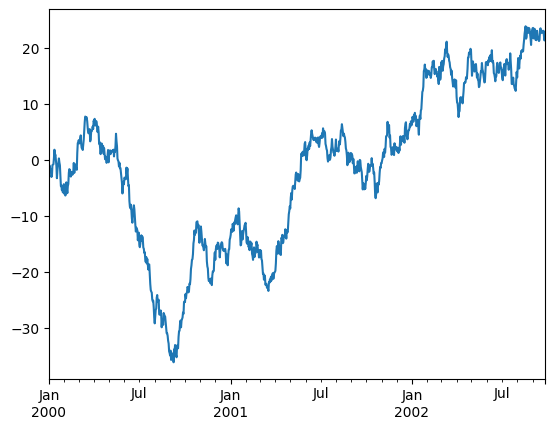

In [70]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

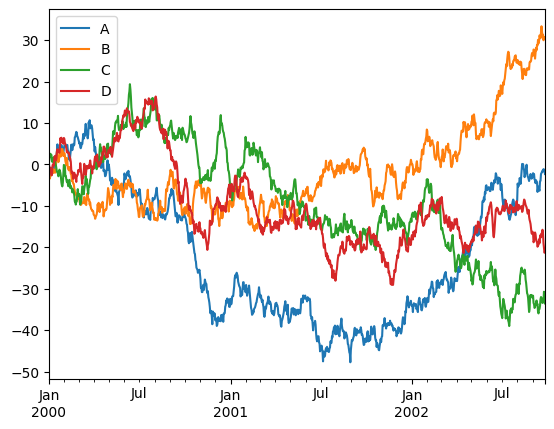

In [71]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')